In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from zoology.analysis.utils import fetch_wandb_runs
from zoology.analysis.d_model import plot

In [4]:
df = fetch_wandb_runs(
    launch_id=[
        "default-2023-10-25-22-20-38", 
        "default-2023-10-26-19-09-31",
        "default-2023-10-27-04-13-56",
        # "default-2023-10-27-16-27-20",
        # "default-2023-10-27-17-13-00"
        # "default-2023-10-28-01-11-39"
        # "default-2023-10-28-01-28-55",
        # "default-2023-10-28-20-42-26"
        # "default-2023-10-29-05-25-38",
        "default-2023-10-29-17-31-26",
        # "default-2023-11-10-22-10-21", # h3
        "default-2023-11-11-01-21-23"
        # "default-2023-11-11-00-44-03"
    ], 
    project_name="zoology"
)

In [5]:
plot_df = df.groupby([
    "model.sequence_mixer.name",
    "model.d_model",
    "data.input_seq_len",
])["valid/accuracy"].max().reset_index()

In [6]:
df["data.input_seq_len"] = df["data.input_seq_len"].fillna(df["data.0.input_seq_len"])

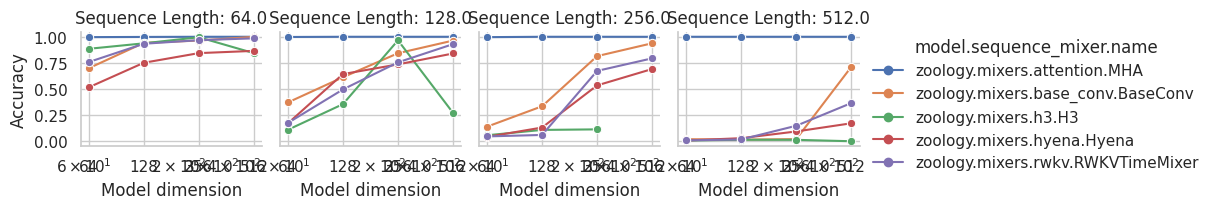

In [7]:
plot(df)

In [12]:
plot_df = df.groupby([
    "model.sequence_mixer.name",
    "model.d_model",
    "data.input_seq_len",
    "learning_rate"
])["valid/accuracy"].max().reset_index()

In [14]:
df[df["model.sequence_mixer.name"].str.contains("h3")]

,model.sequence_mixer.name,model.d_model,data.input_seq_len,learning_rate,valid/accuracy
128,zoology.mixers.h3.H3,64,64.0,0.000100,0.255417
129,zoology.mixers.h3.H3,64,64.0,0.000464,0.643417
130,zoology.mixers.h3.H3,64,64.0,0.002154,0.884917
131,zoology.mixers.h3.H3,64,64.0,0.010000,0.847917
132,zoology.mixers.h3.H3,64,128.0,0.000100,0.086750
133,zoology.mixers.h3.H3,64,128.0,0.000464,0.100458
134,zoology.mixers.h3.H3,64,128.0,0.002154,0.109833
135,zoology.mixers.h3.H3,64,128.0,0.010000,0.098542
136,zoology.mixers.h3.H3,64,256.0,0.000100,0.023250
137,zoology.mixers.h3.H3,64,256.0,0.000464,0.042063


In [10]:
plot_df

,model.sequence_mixer.name,model.d_model,data.input_seq_len,valid/accuracy
0,zoology.mixers.attention.MHA,64,64.0,0.996583
1,zoology.mixers.attention.MHA,64,128.0,0.998083
2,zoology.mixers.attention.MHA,64,256.0,0.996417
3,zoology.mixers.attention.MHA,64,512.0,1.000000
4,zoology.mixers.attention.MHA,128,64.0,0.998500
...,...,...,...,...
74,zoology.mixers.rwkv.RWKVTimeMixer,256,512.0,0.148620
75,zoology.mixers.rwkv.RWKVTimeMixer,512,64.0,0.985083
76,zoology.mixers.rwkv.RWKVTimeMixer,512,128.0,0.929667
77,zoology.mixers.rwkv.RWKVTimeMixer,512,256.0,0.793750


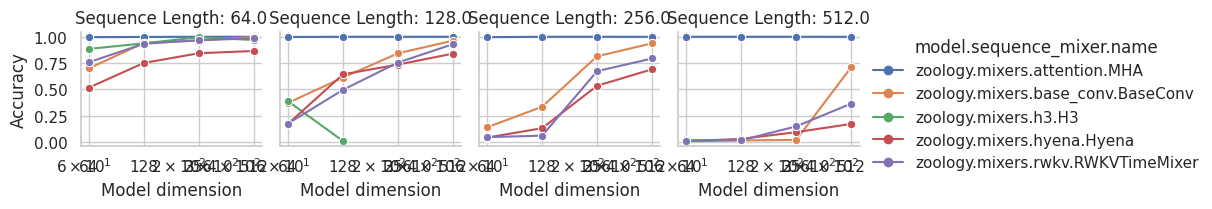

In [7]:
plot(df)

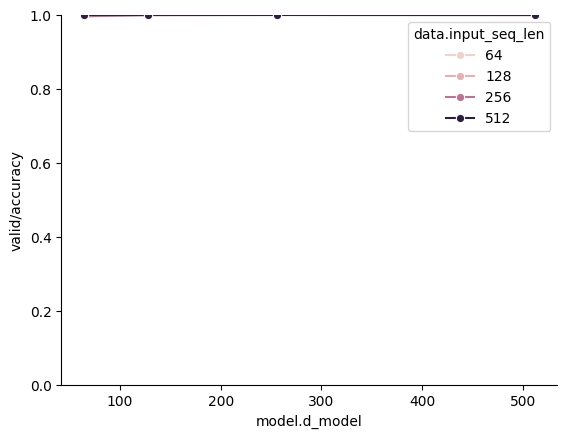

In [13]:
plot_df = df.groupby(
    [
        "model.d_model",
        "data.input_seq_len",
    ]
)["valid/accuracy"].max().reset_index()
sns.lineplot(
    data=plot_df,
    x="model.d_model",
    y="valid/accuracy",
    hue="data.input_seq_len",
    marker="o"
)
plt.ylim(0, 1)
sns.despine()

In [ ]:
df["model.sequence_mixer.name"]